# Data Visualization

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

In [4]:
users = pd.read_csv('../Fake_Data/user_data.csv')
products = pd.read_csv('../Fake_Data/product_data.csv')
behavior = pd.read_csv('../Fake_Data/user_behavior_data.csv')
ratings = pd.read_csv('../Fake_Data/user_ratings.csv')

# Data Exploration
## Data Distribution of Users, Products, and Ratings. 
### Explore the distribution because it helps to understand the data better.

# 1. Age distribution of users (age)

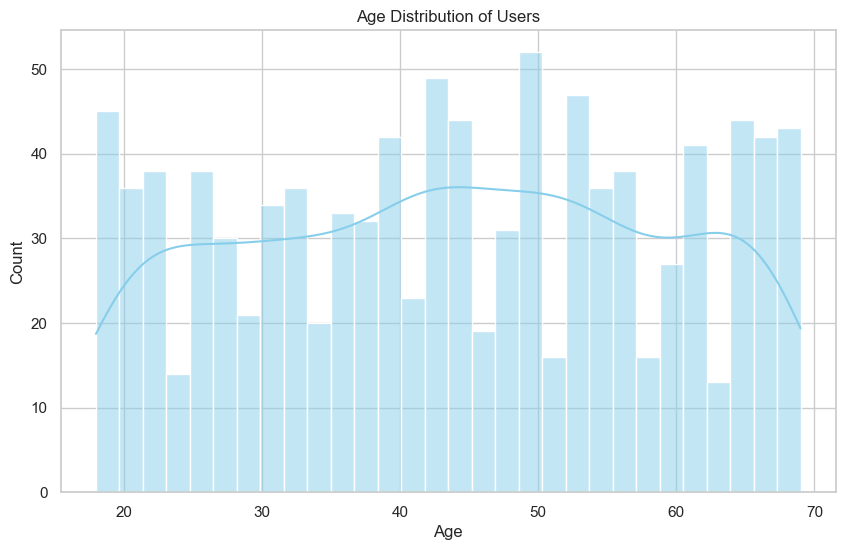

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(users['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Distribution of product prices (prices)

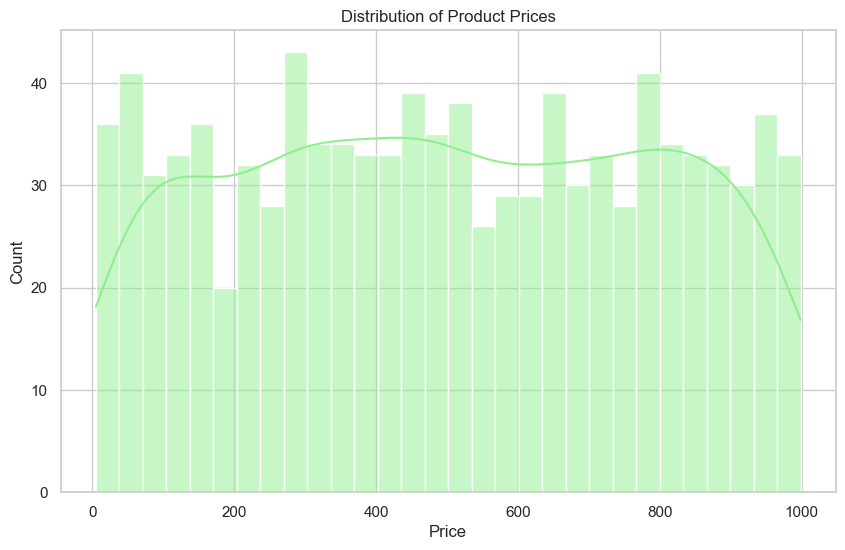

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(products['price'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# 3. Distribution of user ratings (ratings)

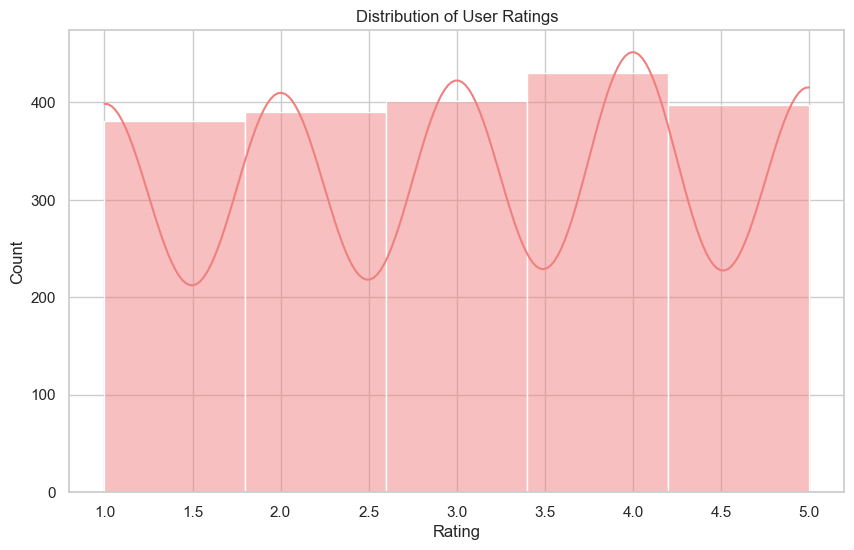

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=5, kde=True, color='lightcoral')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Relationship between variables
## Analyze the relationship between variables to understand the data better.
### Analyze relationships between ratings(price and avg_rating) and products(category and price)

# 1. Scatter plot between price and rating (price and avg_rating)
We follow if the rating goes up as the price increases, showing a relationship between price and rating. 

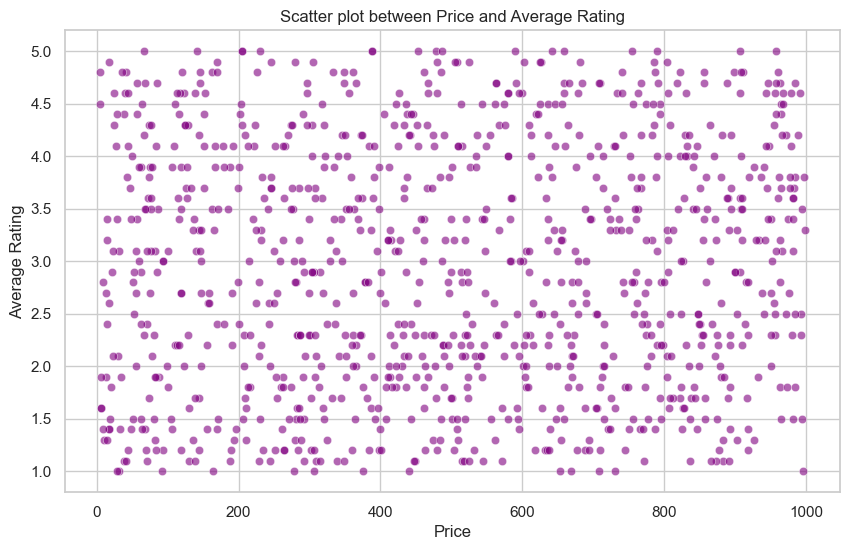

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=products['price'], y=products['avg_rating'], alpha=0.6, color='purple')
plt.title('Scatter plot between Price and Average Rating')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.show()

# 2. Boxplot for price by category (category and price)
Following: notice which categories have higher or lower prices, and where there are large variations or outliers

C:\Users\Darius\AppData\Local\Temp\ipykernel_7420\3501854851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=products['category'], y=products['price'], palette='Set2')


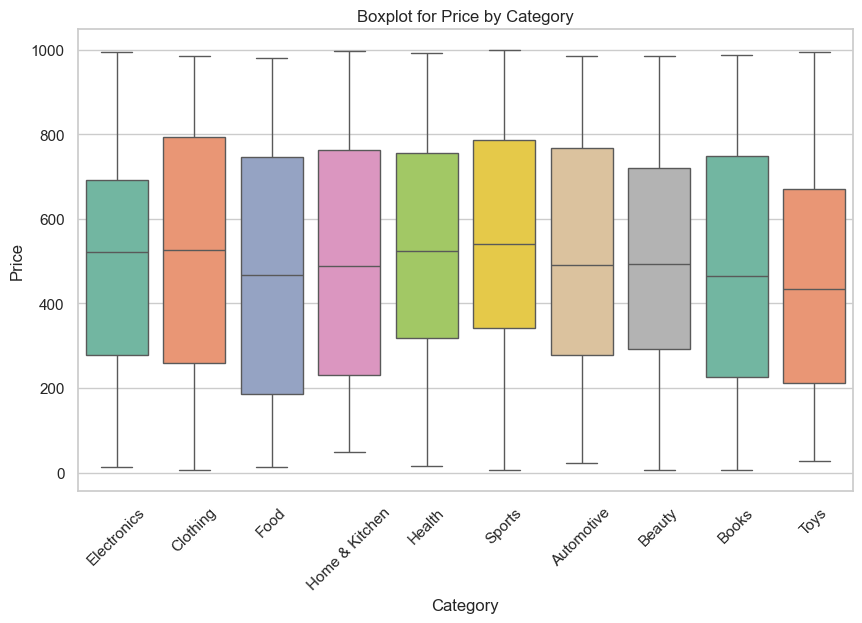

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=products['category'], y=products['price'], palette='Set2')
plt.title('Boxplot for Price by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Convert timestamps to datetime format for easier manipulation and analysis
behavior['view_timestamp'] = pd.to_datetime(behavior['view_timestamp'])
behavior['purchase_timestamp'] = pd.to_datetime(behavior['purchase_timestamp'], errors='coerce')


# 1. Line plot for user behavior over time (views)
Group the data by day and count the number of views each day. This helps us understand how often users view products over time

In [16]:
views_per_day = behavior['view_timestamp'].dt.date.value_counts().sort_index()

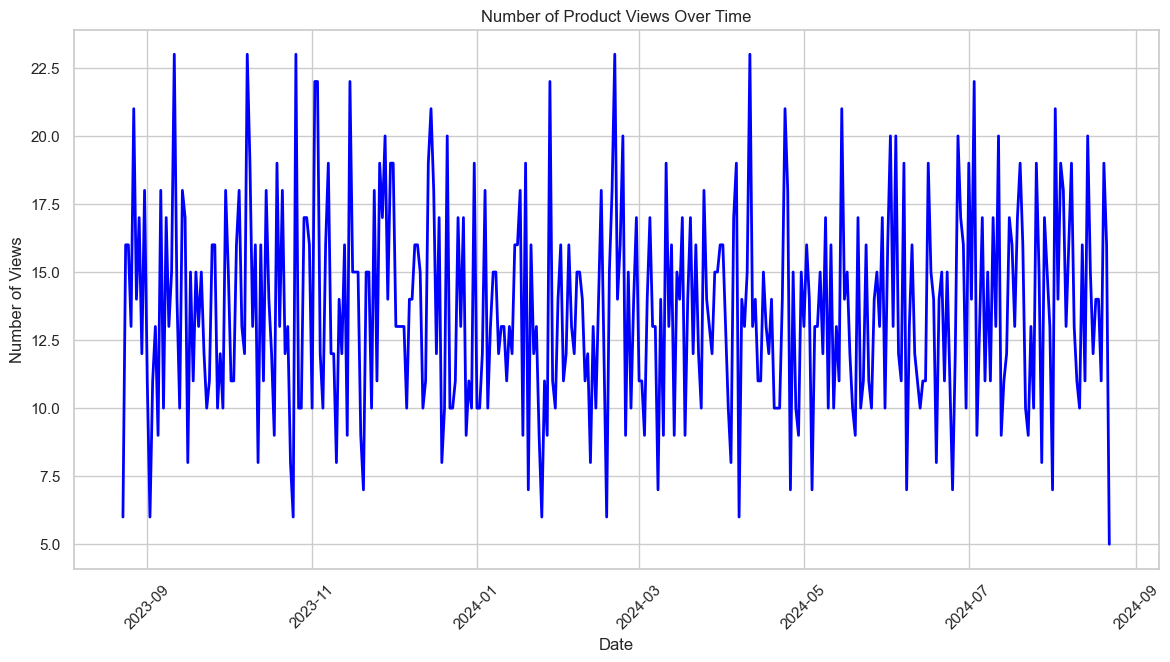

In [23]:
plt.figure(figsize=(14, 7))
views_per_day.plot(kind='line', color='blue', lw=2)
plt.title('Number of Product Views Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 2. Line plot for user behavior over time (purchases)
Group the data by day and count the number of purchases each day. This shows us the purchase patterns over time

In [20]:
purchases_per_day = behavior['purchase_timestamp'].dropna().dt.date.value_counts().sort_index()

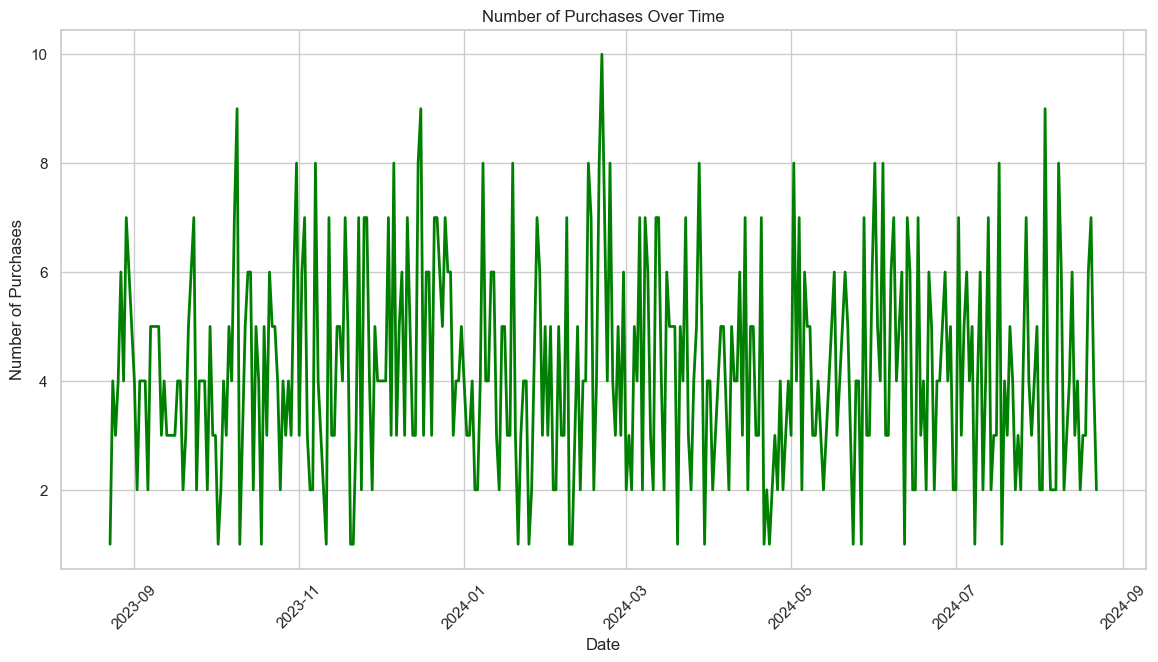

In [21]:
plt.figure(figsize=(14, 7))
purchases_per_day.plot(kind='line', color='green', lw=2)
plt.title('Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 1. Barplot for gender distribution
Count the number of users in each gender category. This plot helps us understand the gender distribution of the users:

C:\Users\Darius\AppData\Local\Temp\ipykernel_7420\2113691621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=users, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

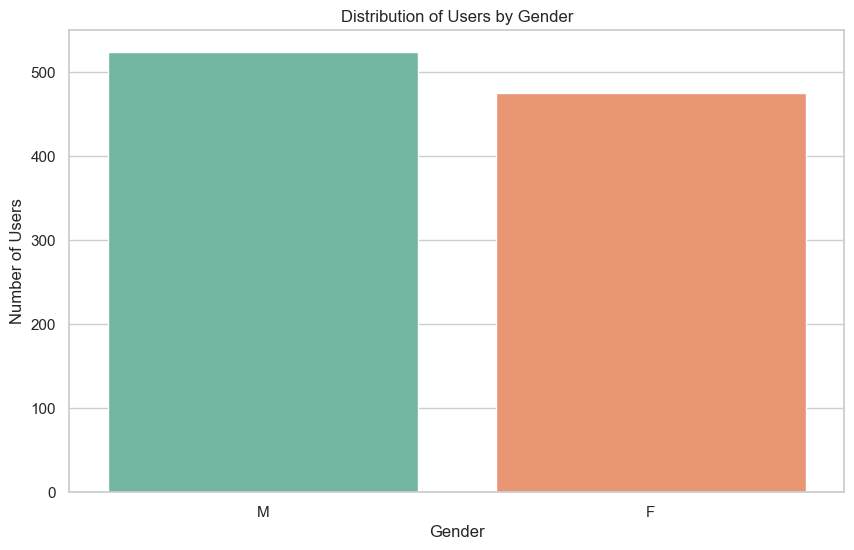

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=users, palette='Set2')
plt.title('Distribution of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show

# 2. Barplot for location distribution
Count the number of users in each location. This plot helps us understand the geographic distribution of the users:

C:\Users\Darius\AppData\Local\Temp\ipykernel_7420\3068633102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette='Set3')


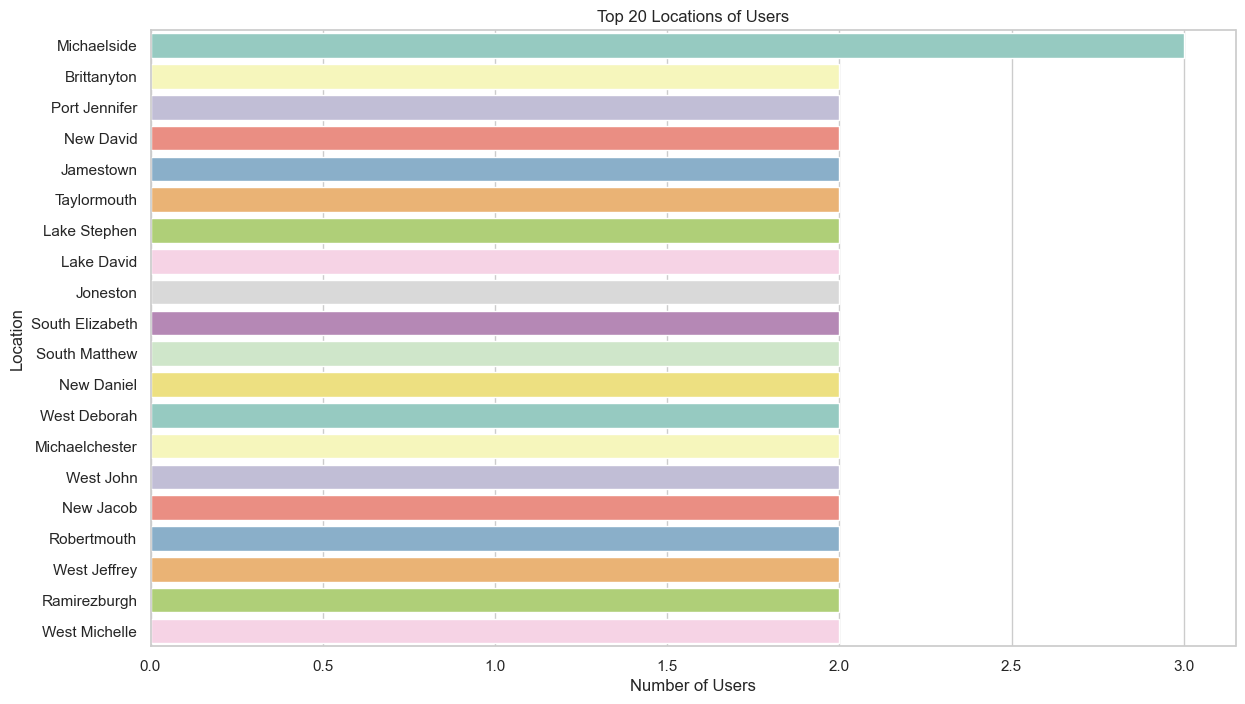

In [25]:
plt.figure(figsize=(14, 8))
location_counts = users['location'].value_counts().head(20)     # Top 20 locations
sns.barplot(x=location_counts.values, y=location_counts.index, palette='Set3')
plt.title('Top 20 Locations of Users')
plt.xlabel('Number of Users')
plt.ylabel('Location')
plt.show()

# Matrices for correlation analysis
Because I want to see how the different variables are correlated with each other, which can suggest which variables might be relevant to our model. 

In [31]:
# Select only the numeric columns for correlation analysis
numeric_columns = ['age', 'price', 'avg_rating', 'rating']

# Create a new DataFrame with the relevant numeric columns
correlation_data = pd.concat([
    users[['age']],
    products[['price', 'avg_rating']],
    ratings[['rating']]
], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

<module 'matplotlib.pyplot' from 'C:\\Users\\Darius\\PycharmProjects\\bahna_darius_tecknoworks_interview_DS\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

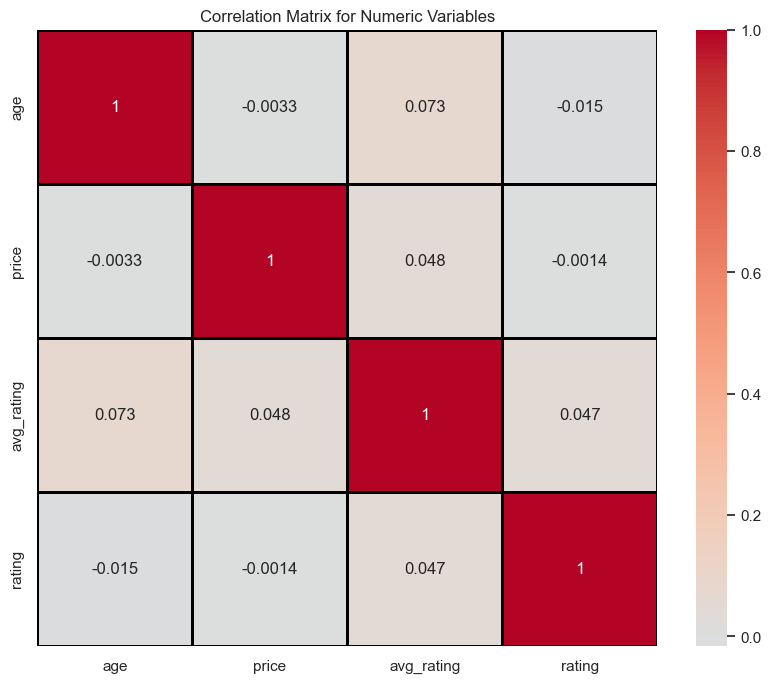

In [33]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title('Correlation Matrix for Numeric Variables')
plt